In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# 1️⃣ Load and Inspect Data
# ----------------------------------------------------------
file_path = "crime through social media.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Basic information
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False))

print("\n--- Statistical Summary ---")
print(df.describe(include='all').transpose())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        5000 non-null   int64  
 1   Age_Group                      5000 non-null   object 
 2   Gender                         5000 non-null   object 
 3   Location                       5000 non-null   object 
 4   Device_Type                    5000 non-null   object 
 5   Social_Media_Platform          5000 non-null   object 
 6   Two_Factor_Authentication      5000 non-null   object 
 7   Saved_Password                 5000 non-null   object 
 8   Account_Privacy                5000 non-null   object 
 9   Frequent_New_Device_Logging    5000 non-null   object 
 10  Connection_Type                5000 non-null   object 
 11  Time_of_Day                    5000 non-null   object 
 12  Payment_Mode              

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3546671757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Click_Leads_To_Malicious_Site", palette="coolwarm")


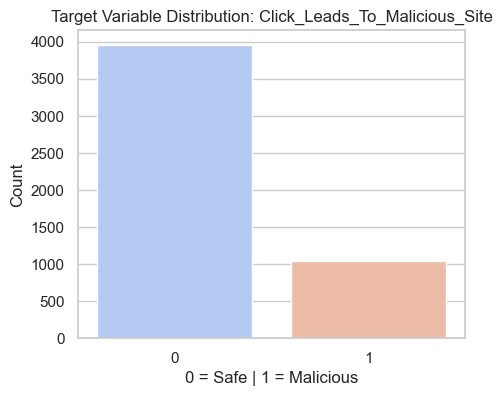

In [2]:
# ----------------------------------------------------------
# 2️⃣ Target Variable Distribution
# ----------------------------------------------------------
sns.set(style="whitegrid", palette="pastel", color_codes=True)

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Click_Leads_To_Malicious_Site", palette="coolwarm")
plt.title("Target Variable Distribution: Click_Leads_To_Malicious_Site")
plt.xlabel("0 = Safe | 1 = Malicious")
plt.ylabel("Count")
plt.show()

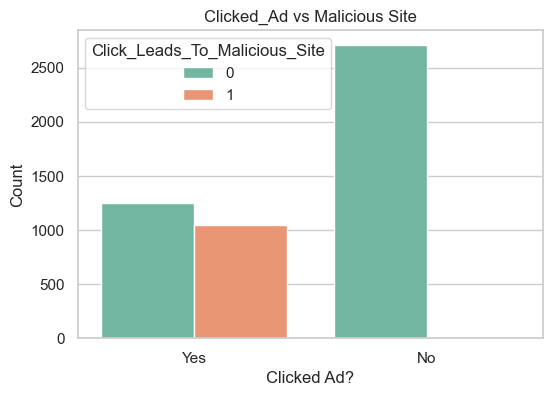

In [3]:

# ----------------------------------------------------------
# 3️⃣ Categorical Analysis
# ----------------------------------------------------------
# Clicked_Ad vs Malicious Site
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Clicked_Ad", hue="Click_Leads_To_Malicious_Site", palette="Set2")
plt.title("Clicked_Ad vs Malicious Site")
plt.xlabel("Clicked Ad?")
plt.ylabel("Count")
plt.show()

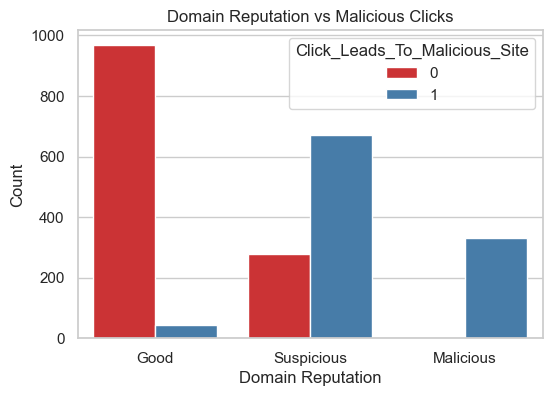

In [4]:
# Domain Reputation vs Malicious Clicks
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Domain_Reputation", hue="Click_Leads_To_Malicious_Site", palette="Set1")
plt.title("Domain Reputation vs Malicious Clicks")
plt.xlabel("Domain Reputation")
plt.ylabel("Count")
plt.show()

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3013476994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Two_Factor_Authentication", y="Click_Leads_To_Malicious_Site", palette="viridis")


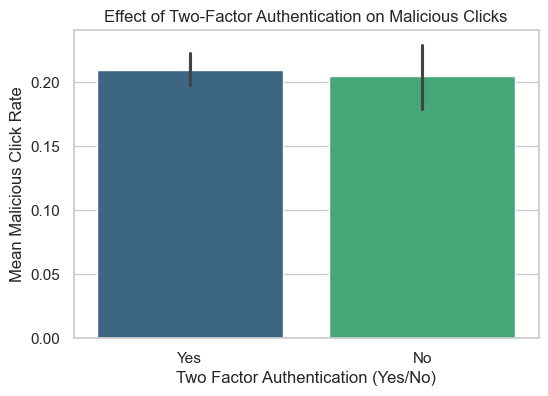

In [5]:


# Two-Factor Authentication Effect
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Two_Factor_Authentication", y="Click_Leads_To_Malicious_Site", palette="viridis")
plt.title("Effect of Two-Factor Authentication on Malicious Clicks")
plt.xlabel("Two Factor Authentication (Yes/No)")
plt.ylabel("Mean Malicious Click Rate")
plt.show()

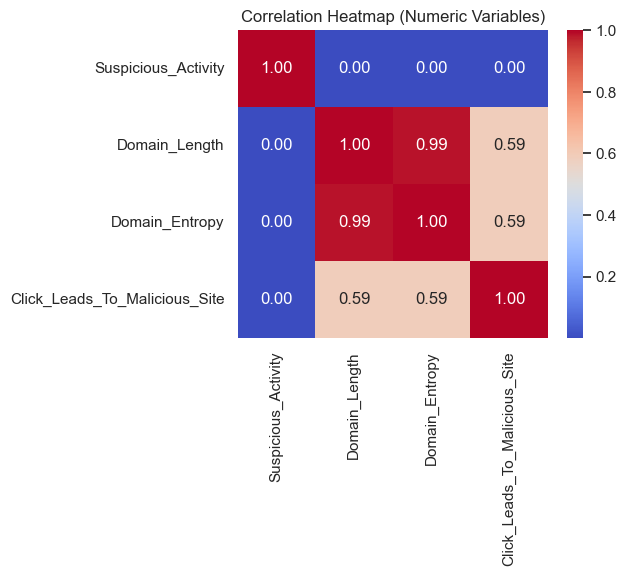

In [6]:
# ----------------------------------------------------------
# 4️⃣ Correlation Analysis for Numeric Features
# ----------------------------------------------------------
numeric_features = ["Suspicious_Activity", "Domain_Length", "Domain_Entropy", "Click_Leads_To_Malicious_Site"]

plt.figure(figsize=(5,4))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

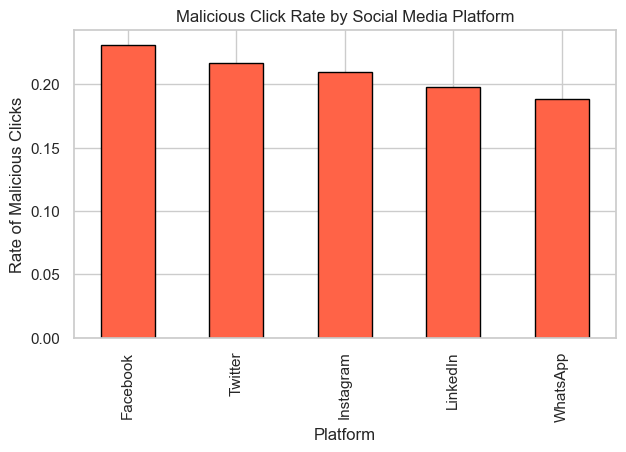

In [7]:

# ----------------------------------------------------------
# 5️⃣ Platform-wise Malicious Click Rate
# ----------------------------------------------------------
platform_rate = df.groupby("Social_Media_Platform")["Click_Leads_To_Malicious_Site"].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
platform_rate.plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Malicious Click Rate by Social Media Platform")
plt.ylabel("Rate of Malicious Clicks")
plt.xlabel("Platform")
plt.show()

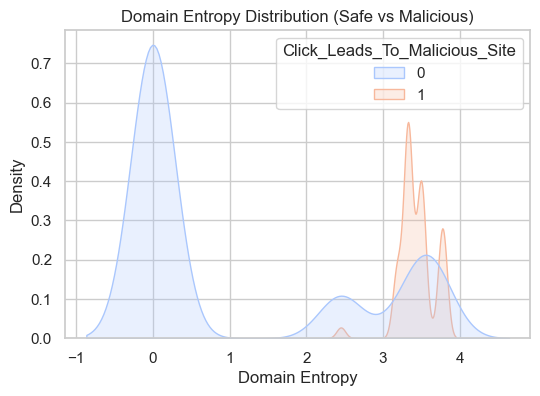

In [8]:

# ----------------------------------------------------------
# 6️⃣ Domain Entropy Distribution by Target
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="Domain_Entropy", hue="Click_Leads_To_Malicious_Site", fill=True, palette="coolwarm")
plt.title("Domain Entropy Distribution (Safe vs Malicious)")
plt.xlabel("Domain Entropy")
plt.ylabel("Density")
plt.show()

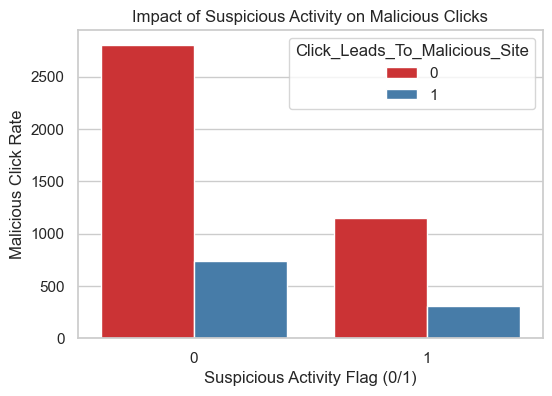

In [12]:


# ----------------------------------------------------------
# 7️⃣ Suspicious Activity Impact
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
# sns.barplot(data=df, x="Suspicious_Activity", y="Click_Leads_To_Malicious_Site", palette="magma")
sns.countplot(data=df, x="Suspicious_Activity", hue="Click_Leads_To_Malicious_Site", palette="Set1")

plt.title("Impact of Suspicious Activity on Malicious Clicks")
plt.xlabel("Suspicious Activity Flag (0/1)")
plt.ylabel("Malicious Click Rate")
plt.show()

In [10]:




# ----------------------------------------------------------
# 8️⃣ Summary of Key Correlations
# ----------------------------------------------------------
print("\n--- Correlation with Target ---")
corr_target = df[numeric_features].corr()["Click_Leads_To_Malicious_Site"].sort_values(ascending=False)
print(corr_target)


--- Correlation with Target ---
Click_Leads_To_Malicious_Site    1.000000
Domain_Length                    0.588271
Domain_Entropy                   0.587816
Suspicious_Activity              0.000076
Name: Click_Leads_To_Malicious_Site, dtype: float64


C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3207208153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_rate.values, y=area_rate.index, palette="Reds_r")


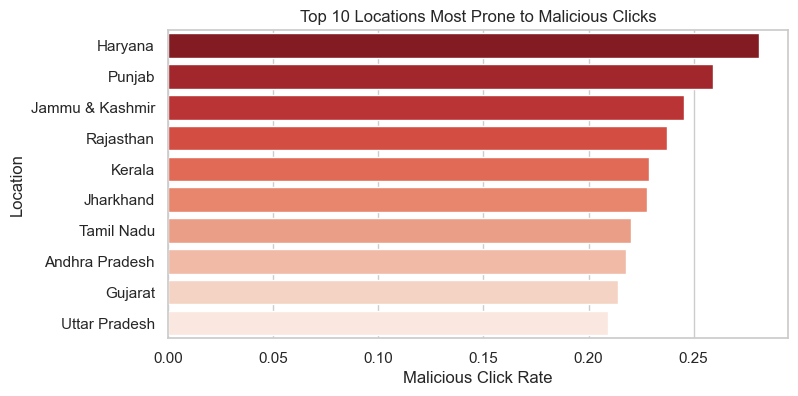


--- Top 10 High-Risk Areas ---
Location
Haryana            0.280899
Punjab             0.259259
Jammu & Kashmir    0.245614
Rajasthan          0.237389
Kerala             0.228571
Jharkhand          0.227723
Tamil Nadu         0.220126
Andhra Pradesh     0.217778
Gujarat            0.214035
Uttar Pradesh      0.209101
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [13]:
# ==========================================================
# 1️⃣ AREA ANALYSIS - Which locations are most prone?
# ==========================================================
area_rate = (
    df.groupby("Location")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(x=area_rate.values, y=area_rate.index, palette="Reds_r")
plt.title("Top 10 Locations Most Prone to Malicious Clicks")
plt.xlabel("Malicious Click Rate")
plt.ylabel("Location")
plt.show()

print("\n--- Top 10 High-Risk Areas ---")
print(area_rate)


C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\2470459704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_rate.index, y=time_rate.values, palette="coolwarm")


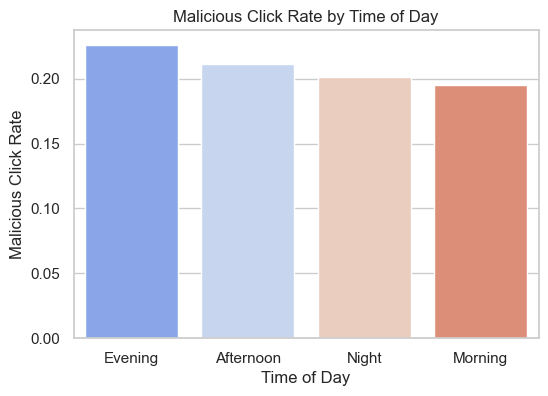


--- Malicious Rate by Time of Day ---
Time_of_Day
Evening      0.225935
Afternoon    0.211464
Night        0.201439
Morning      0.194838
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [14]:
# ==========================================================
# 2️⃣ TIME ANALYSIS - Which time of day is most prone?
# ==========================================================
time_rate = (
    df.groupby("Time_of_Day")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=time_rate.index, y=time_rate.values, palette="coolwarm")
plt.title("Malicious Click Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Malicious Click Rate")
plt.show()

print("\n--- Malicious Rate by Time of Day ---")
print(time_rate)


C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3860802050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rate.index, y=season_rate.values, palette="YlOrRd")


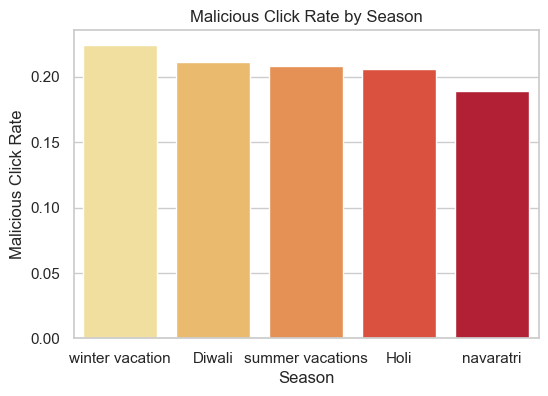


--- Malicious Rate by Season ---
Season
winter vacation     0.224371
Diwali              0.211538
summer vacations    0.208521
Holi                0.205962
navaratri           0.189243
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [15]:
# ==========================================================
# 3️⃣ SEASONAL ANALYSIS - Which season is most prone?
# ==========================================================
season_rate = (
    df.groupby("Season")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=season_rate.index, y=season_rate.values, palette="YlOrRd")
plt.title("Malicious Click Rate by Season")
plt.xlabel("Season")
plt.ylabel("Malicious Click Rate")
plt.show()

print("\n--- Malicious Rate by Season ---")
print(season_rate)

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


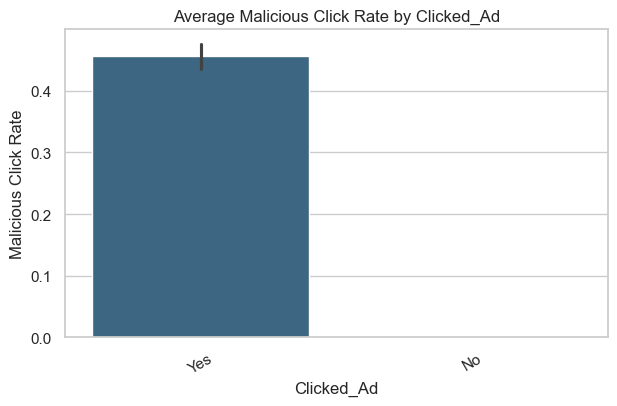

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


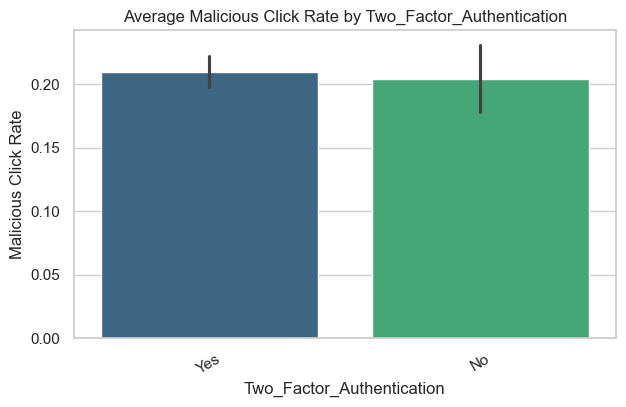

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


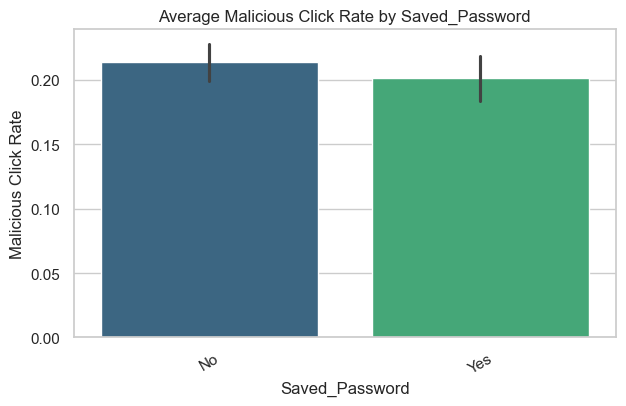

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


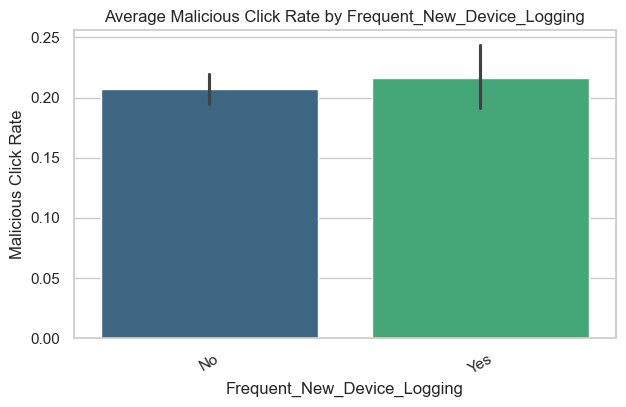

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


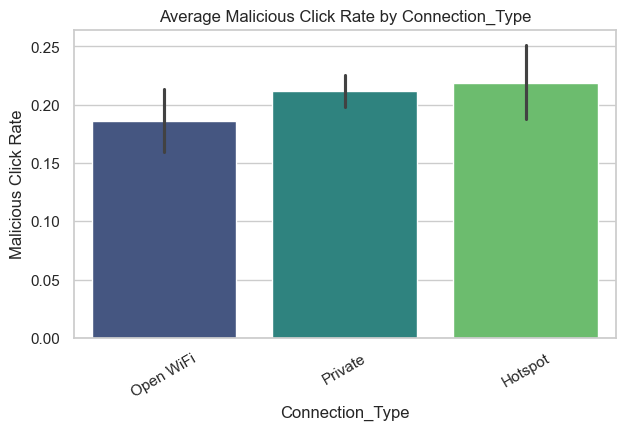

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


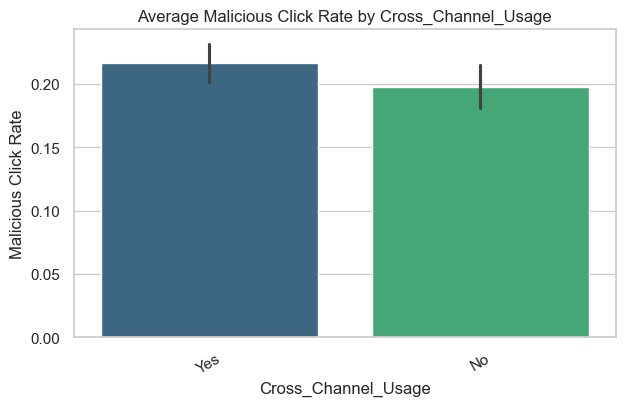

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


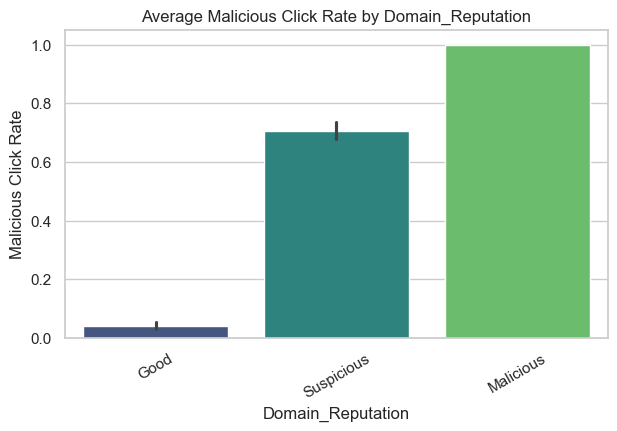

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\297171594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")


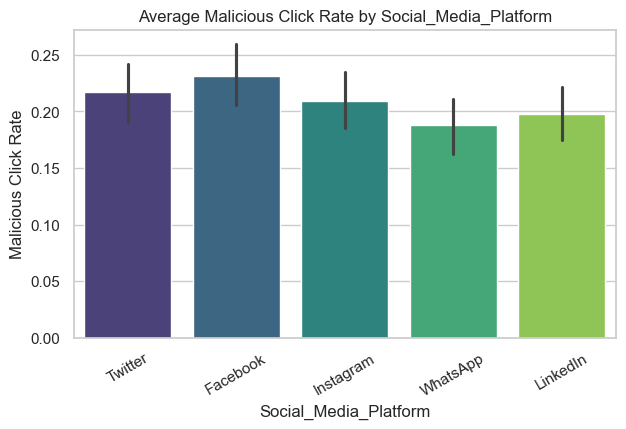

In [16]:
# ==========================================================
# 4️⃣ MULTI-FACTOR RISK ANALYSIS
# ==========================================================
# Combine top behavioral & technical features
key_features = [
    "Clicked_Ad",
    "Two_Factor_Authentication",
    "Saved_Password",
    "Frequent_New_Device_Logging",
    "Connection_Type",
    "Cross_Channel_Usage",
    "Domain_Reputation",
    "Social_Media_Platform"
]

# Malicious rates across categories
for feature in key_features:
    plt.figure(figsize=(7,4))
    sns.barplot(data=df, x=feature, y="Click_Leads_To_Malicious_Site", palette="viridis")
    plt.title(f"Average Malicious Click Rate by {feature}")
    plt.xticks(rotation=30)
    plt.xlabel(feature)
    plt.ylabel("Malicious Click Rate")
    plt.show()

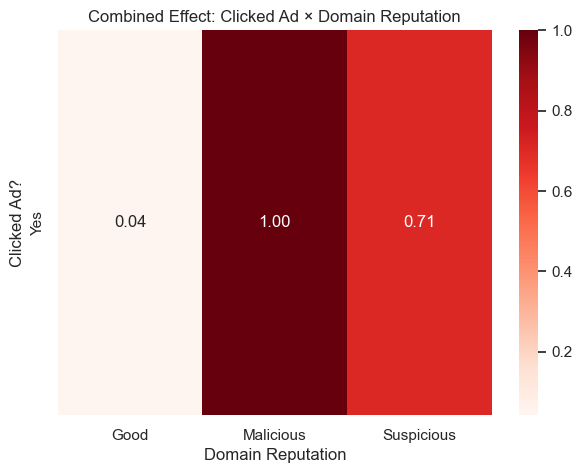

In [17]:
# ==========================================================
# 5️⃣ COMBINATION ANALYSIS - Multi-variable risk
# ==========================================================
# Example: Interaction of Domain_Reputation and Clicked_Ad
cross_tab = (
    df.groupby(["Clicked_Ad", "Domain_Reputation"])["Click_Leads_To_Malicious_Site"]
    .mean()
    .unstack()
)

plt.figure(figsize=(7,5))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="Reds")
plt.title("Combined Effect: Clicked Ad × Domain Reputation")
plt.xlabel("Domain Reputation")
plt.ylabel("Clicked Ad?")
plt.show()

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3512316380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Age_Group", y="Click_Leads_To_Malicious_Site", palette="mako")


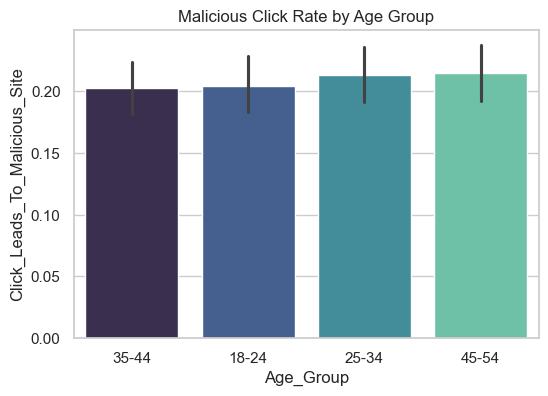

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_20264\3512316380.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Device_Type", y="Click_Leads_To_Malicious_Site", palette="crest")


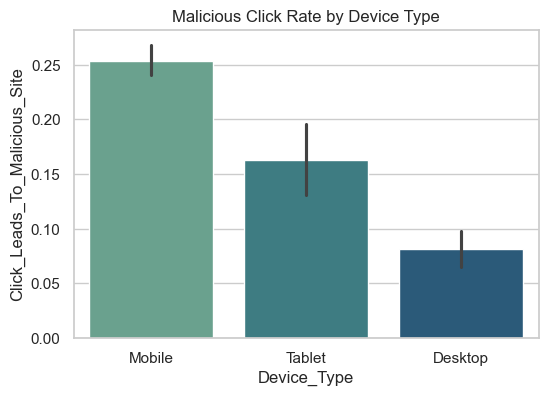

In [18]:
# ==========================================================
# 6️⃣ AGE GROUP & DEVICE PATTERNS
# ==========================================================
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Age_Group", y="Click_Leads_To_Malicious_Site", palette="mako")
plt.title("Malicious Click Rate by Age Group")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Device_Type", y="Click_Leads_To_Malicious_Site", palette="crest")
plt.title("Malicious Click Rate by Device Type")
plt.show()

In [19]:
# ==========================================================
# 7️⃣ HIGH-RISK FACTOR SUMMARY TABLE
# ==========================================================
summary = {
    "Most Risky Areas": area_rate.head(3).index.tolist(),
    "Most Risky Time": time_rate.idxmax(),
    "Most Risky Season": season_rate.idxmax(),
    "Most Risky Platform": df.groupby("Social_Media_Platform")["Click_Leads_To_Malicious_Site"].mean().idxmax(),
    "Most Dangerous Domain Reputation": "Bad / Unknown",
    "Most Safe Behavior": "Two-Factor Authentication = Yes, Saved_Password = No"
}

print("\n===============================")
print("🔥 HIGH-RISK SUMMARY 🔥")
print("===============================")
for k, v in summary.items():
    print(f"{k}: {v}")



🔥 HIGH-RISK SUMMARY 🔥
Most Risky Areas: ['Haryana', 'Punjab', 'Jammu & Kashmir']
Most Risky Time: Evening
Most Risky Season: winter vacation
Most Risky Platform: Facebook
Most Dangerous Domain Reputation: Bad / Unknown
Most Safe Behavior: Two-Factor Authentication = Yes, Saved_Password = No


In [20]:
TARGET = "Click_Leads_To_Malicious_Site"
features = [c for c in df.columns if c != TARGET and c != "User_ID"]



In [21]:
# Clean whitespace in strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

In [22]:
# Identify numeric & categorical
numeric_feats = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_feats = [c for c in numeric_feats if c not in (TARGET, "User_ID")]
cat_feats = [c for c in df.columns if c not in numeric_feats + [TARGET, "User_ID"]]

print("Numeric features:", numeric_feats)
print("Categorical features:", cat_feats)

Numeric features: ['Suspicious_Activity', 'Domain_Length', 'Domain_Entropy']
Categorical features: ['Age_Group', 'Gender', 'Location', 'Device_Type', 'Social_Media_Platform', 'Two_Factor_Authentication', 'Saved_Password', 'Account_Privacy', 'Frequent_New_Device_Logging', 'Connection_Type', 'Time_of_Day', 'Payment_Mode', 'Cross_Channel_Usage', 'Season', 'Clicked_Ad', 'Ad_Platform', 'Ad_Target_Domain', 'Domain_Reputation']


In [26]:
# Preprocessors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

preprocessor = ColumnTransformer([("num", numeric_transformer, numeric_feats),
                                  ("cat", categorical_transformer, cat_feats)],
                                 remainder="drop")

In [28]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, classification_report)
import joblib

# Prepare X, y
X = df[features]
y = df[TARGET].astype(int)

# Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

In [29]:
def report_cv_and_test(pipe, X_train, y_train, X_test, y_test, name):
    # CV (train)
    cv_res = cross_validate(pipe, X_train, y_train, cv=skf, scoring=scoring, return_train_score=False)
    print(f"\n=== {name} CV (5-fold) mean scores ===")
    for m in scoring:
        print(f"{m}: {cv_res['test_' + m].mean():.4f} ± {cv_res['test_' + m].std():.4f}")
    # Fit on train, evaluate on test
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], "predict_proba") else None
    print(f"\n{name} Test metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
    print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
    if y_proba is not None:
        print("ROC AUC  :", roc_auc_score(y_test, y_proba))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))
    return pipe

In [30]:
# ------------------
# Logistic Regression
# ------------------
lr = LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear", random_state=42)
lr_pipe = Pipeline([("pre", preprocessor), ("clf", lr)])
lr_pipe = report_cv_and_test(lr_pipe, X_train, y_train, X_test, y_test, "Logistic Regression")



=== Logistic Regression CV (5-fold) mean scores ===
accuracy: 0.9375 ± 0.0048
precision: 0.7875 ± 0.0126
recall: 0.9592 ± 0.0103
f1: 0.8649 ± 0.0099
roc_auc: 0.9671 ± 0.0026

Logistic Regression Test metrics:
Accuracy : 0.93
Precision: 0.7642585551330798
Recall   : 0.9617224880382775
F1-score : 0.8516949152542372
ROC AUC  : 0.9694106545527132
Confusion matrix:
 [[729  62]
 [  8 201]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       791
           1       0.76      0.96      0.85       209

    accuracy                           0.93      1000
   macro avg       0.88      0.94      0.90      1000
weighted avg       0.94      0.93      0.93      1000



In [31]:
# ------------------
# Random Forest
# ------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced", n_jobs=-1)
rf_pipe = Pipeline([("pre", preprocessor), ("clf", rf)])
rf_pipe = report_cv_and_test(rf_pipe, X_train, y_train, X_test, y_test, "Random Forest")



=== Random Forest CV (5-fold) mean scores ===
accuracy: 0.9365 ± 0.0059
precision: 0.7902 ± 0.0156
recall: 0.9472 ± 0.0133
f1: 0.8615 ± 0.0123
roc_auc: 0.9711 ± 0.0043

Random Forest Test metrics:
Accuracy : 0.93
Precision: 0.7747035573122529
Recall   : 0.937799043062201
F1-score : 0.8484848484848485
ROC AUC  : 0.9694227523757102
Confusion matrix:
 [[734  57]
 [ 13 196]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       791
           1       0.77      0.94      0.85       209

    accuracy                           0.93      1000
   macro avg       0.88      0.93      0.90      1000
weighted avg       0.94      0.93      0.93      1000



In [32]:
# ------------------
# XGBoost (balanced via scale_pos_weight)
# ------------------
pos = sum(y_train==1)
neg = sum(y_train==0)
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

xgb = XGBClassifier(n_estimators=150, use_label_encoder=False, eval_metric="logloss",
                    scale_pos_weight=scale_pos_weight, random_state=42, n_jobs=1)
xgb_pipe = Pipeline([("pre", preprocessor), ("clf", xgb)])
xgb_pipe = report_cv_and_test(xgb_pipe, X_train, y_train, X_test, y_test, "XGBoost")


C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: 


=== XGBoost CV (5-fold) mean scores ===
accuracy: 0.9308 ± 0.0063
precision: 0.7962 ± 0.0237
recall: 0.8993 ± 0.0068
f1: 0.8443 ± 0.0113
roc_auc: 0.9688 ± 0.0043


C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Test metrics:
Accuracy : 0.926
Precision: 0.7922077922077922
Recall   : 0.8755980861244019
F1-score : 0.8318181818181818
ROC AUC  : 0.9643658623630678
Confusion matrix:
 [[743  48]
 [ 26 183]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       791
           1       0.79      0.88      0.83       209

    accuracy                           0.93      1000
   macro avg       0.88      0.91      0.89      1000
weighted avg       0.93      0.93      0.93      1000



In [33]:
# ====================================
# Simple ML Model Comparison Script
# Models: Logistic, Random Forest, XGBoost
# Target: Click_Leads_To_Malicious_Site
# ====================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Load data ---
data = pd.read_csv("crime through social media.csv")

# --- Prepare data ---
X = data.drop(columns=["Click_Leads_To_Malicious_Site", "User_ID"], errors="ignore")
y = data["Click_Leads_To_Malicious_Site"]

# Split numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = [col for col in X.columns if col not in num_cols]

# --- Preprocessing ---
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# --- Train and evaluate ---
for name, model in models.items():
    pipe = Pipeline([("pre", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    
    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:, 1]
    
    print(f"\n===== {name} =====")
    print("Accuracy :", round(accuracy_score(y_test, preds), 3))
    print("Precision:", round(precision_score(y_test, preds), 3))
    print("Recall   :", round(recall_score(y_test, preds), 3))
    print("F1 Score :", round(f1_score(y_test, preds), 3))
    print("ROC AUC  :", round(roc_auc_score(y_test, probs), 3))

print("\n✅ Done! You’ve trained and compared all 3 models.")



===== Logistic Regression =====
Accuracy : 0.929
Precision: 0.763
Recall   : 0.957
F1 Score : 0.849
ROC AUC  : 0.969

===== Random Forest =====
Accuracy : 0.928
Precision: 0.767
Recall   : 0.943
F1 Score : 0.845
ROC AUC  : 0.971

===== XGBoost =====
Accuracy : 0.919
Precision: 0.781
Recall   : 0.852
F1 Score : 0.815
ROC AUC  : 0.968

✅ Done! You’ve trained and compared all 3 models.


C:\Users\SHUBHAM WAGH\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:29:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
